## Logistic Regression 

In [183]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_selection import chi2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing the PreProcessed Data Set

In [184]:
df =  pd.read_csv('../../../data/train_V2.csv')

In [185]:
df[:5]

,Unnamed: 0,OutcomeType,Cat,Dog,Female,Intact,Male,Neutered,Spayed,Age,...,Tan,Tick,Tiger,Torbie,Tortie,Tricolor,White,Yellow,Mixed,Purebred
0,0,Return_to_owner,0,1,0,0,1,1,0,365,...,0,0,0,0,0,0,1,0,1,0
1,1,Euthanasia,1,0,1,0,0,0,1,365,...,0,0,0,0,0,0,0,0,1,0
2,2,Adoption,0,1,0,0,1,1,0,730,...,0,0,0,0,0,0,1,0,1,0
3,3,Transfer,1,0,0,1,1,0,0,21,...,0,0,0,0,0,0,0,0,1,0
4,4,Transfer,0,1,0,0,1,1,0,730,...,1,0,0,0,0,0,0,0,0,1


### Here we want to grab the features we want and in this first run i will be trying it without all of the colors in order to see the results

In [186]:
feature_cols = ["Cat","Dog","Female","Intact","Male","Neutered","Age","Spayed","Purebred"]

In [187]:
X = df[feature_cols]

In [188]:
y = df['OutcomeType']

### We are Going to be using Logistic Regression on this Data Set

In [191]:
my_logreg = LogisticRegression()

### We split the Data up into Testing and Training Sets 

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=4)

### We perform Training and Testing on the Data 

In [193]:
my_logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [194]:
y_predict_logred = my_logreg.predict(X_test)

In [195]:
accuracy_logred = accuracy_score(y_test, y_predict_logred)

#### Here we get an Accuracy of .6247 So now we will try different methods to see if we can get better Results

In [196]:
print(accuracy_logred)

0.6247661803217359


### Here we use 10 fold to try to get a better Result 

In [197]:
accuracy_list = cross_val_score(my_logreg, X, y, cv=10, scoring='accuracy')

print(accuracy_list)

[0.62990654 0.61794393 0.62341062 0.62116679 0.631638   0.62701085
 0.61452096 0.63721453 0.62785474 0.63183521]


### The accuracy we recieve from using 10 fold is slightly higher but we would still like to see if higher accuracy is attainable

In [198]:
accuracy_cv = accuracy_list.mean()

print(accuracy_cv)

0.6262502150676673


### In the previous Classifier we excluded all of the |olors and we want to see if including color has an impact on our Results,  We get a result of 0.6249 which is already better that the original accuracy we got earlier by a tiny bit.

In [199]:
feature_cols = ["Cat","Dog","Female","Intact","Male","Neutered","Age","Spayed","Agouti","Apricot","Black","Blue","Brindle","Brown","Buff","Calico","Chocolate","Cream","Fawn","Flame","Gold","Gray","Lilac","Liver","Lynx","Merle","Orange","Pink","Point","Red","Ruddy","Sable","Seal","Silver","Smoke","Tabby","Tan","Tick","Tiger","Torbie","Tortie","Tricolor","White","Yellow","Mixed","Purebred"]

X = df[feature_cols]

y = df['OutcomeType']

my_logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=4)

my_logreg.fit(X_train, y_train)

y_predict_logred = my_logreg.predict(X_test)

accuracy_logred = accuracy_score(y_test, y_predict_logred)

print(accuracy_logred)




0.6249532360643472


### We now preform 10 fold to see if accuracy would increase and we get a value of .6268 which is also greater than the originals 10 fold

In [200]:

accuracy_list = cross_val_score(my_logreg, X, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()
print(accuracy_cv)


0.6268869886485664


### In this itteration we are now going to try to normalize our data set using all of the data set since it produced a higher result and again we are able to reach an eben more greater result with 0.7962

In [211]:
feature_cols = ["Cat","Dog","Female","Intact","Male","Neutered","Age","Spayed","Agouti","Apricot","Black","Blue","Brindle","Brown","Buff","Calico","Chocolate","Cream","Fawn","Flame","Gold","Gray","Lilac","Liver","Lynx","Merle","Orange","Pink","Point","Red","Ruddy","Sable","Seal","Silver","Smoke","Tabby","Tan","Tick","Tiger","Torbie","Tortie","Tricolor","White","Yellow","Mixed","Purebred"]
X = df[feature_cols]
X = preprocessing.scale(X) 
y = df['OutcomeType']

my_logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=4)

my_logreg.fit(X_train, y_train)

y_predict_logred = my_logreg.predict(X_test)

accuracy_logred = accuracy_score(y_test, y_predict_logred)

dataforGraph = y_predict_logred
dataforGraphTwo = y_test

print(accuracy_logred)

0.6251402918069585


### We again try 10 fold on the data set and get a result of 0.62714 so far the highest we have gotten 

In [213]:
accuracy_list = cross_val_score(my_logreg, X, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()
print(accuracy_cv)
## ROC Curve 

0.6271483908783917


### Here we are looking at the features and seeing the accuracy of each in order to figure out if there is a feature that has higher results

In [203]:
accuracyList = []
features = ["Cat","Dog","Female","Intact","Male","Neutered","Age","Spayed","Agouti","Apricot","Black","Blue","Brindle","Brown","Buff","Calico","Chocolate","Cream","Fawn","Flame","Gold","Gray","Lilac","Liver","Lynx","Merle","Orange","Pink","Point","Red","Ruddy","Sable","Seal","Silver","Smoke","Tabby","Tan","Tick","Tiger","Torbie","Tortie","Tricolor","White","Yellow","Mixed","Purebred"]
for x in features:
    feature_cols = [x]
    X= df[feature_cols]
    y = df['OutcomeType']
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=6)
    my_logreg = LogisticRegression()
    my_logreg.fit(X_train, y_train)
    y_predict = my_logreg.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    accuracyList.append(accuracy)
    

### We learn from this that the highest 2 without Correlation Happen to be Intact and Age and i predict this will be the two best features

In [204]:
accuracyList

[0.4566030677141788,
 0.4566030677141788,
 0.4047886270108492,
 0.5775346053123831,
 0.4047886270108492,
 0.4765245043022821,
 0.4218106995884774,
 0.4942012719790498,
 0.4047886270108492,
 0.4047886270108492,
 0.4047886270108492,
 0.4022633744855967,
 0.4047886270108492,
 0.4047886270108492,
 0.4047886270108492,
 0.40693976805087917,
 0.4047886270108492,
 0.4047886270108492,
 0.4047886270108492,
 0.4047886270108492,
 0.4057239057239057,
 0.40422745978301533,
 0.4051627384960718,
 0.4049756827534605,
 0.4047886270108492,
 0.4047886270108492,
 0.4114291058735503,
 0.4048821548821549,
 0.4047886270108492,
 0.4047886270108492,
 0.4047886270108492,
 0.4047886270108492,
 0.4049756827534605,
 0.4047886270108492,
 0.4047886270108492,
 0.42976056864945755,
 0.4047886270108492,
 0.4047886270108492,
 0.4047886270108492,
 0.4051627384960718,
 0.4047886270108492,
 0.4047886270108492,
 0.4047886270108492,
 0.4039468761690984,
 0.4047886270108492,
 0.4047886270108492]

#### Here We are going to try it with the changed dataset, Ok values stand for Adopted and Return to owner and NO values are for Transfer death and Euthanization, We do this because We know that the good outcomes for the animal would be Adopted/ReturnToOwner and the BadOutcomes would be to Transfer/Euthanization/Death, we also do this cause deathhad very low numbers so summing Them up together makes sense.

In [214]:
df2  =  pd.read_csv('../../../data/train_V3R.csv')
feature_cols = ["Cat","Dog","Female","Intact","Male","Neutered","Age","Spayed","Agouti","Apricot","Black","Blue","Brindle","Brown","Buff","Calico","Chocolate","Cream","Fawn","Flame","Gold","Gray","Lilac","Liver","Lynx","Merle","Orange","Pink","Point","Red","Ruddy","Sable","Seal","Silver","Smoke","Tabby","Tan","Tick","Tiger","Torbie","Tortie","Tricolor","White","Yellow","Mixed","Purebred"]

X2 = df2[feature_cols]
X2 = preprocessing.scale(X2) 
y2 = df2['OutcomeType']

my_logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X2,y2, test_size=0.20, random_state=4)

my_logreg.fit(X_train, y_train)

y_predict_logred = my_logreg.predict(X_test)

accuracy_logred = accuracy_score(y_test, y_predict_logred)

print(accuracy_logred)
print(df2[::5])



0.7962962962962963
       Unnamed: 0 OutcomeType  Cat  Dog  Female  Intact  Male  Neutered  \
0               0          OK    0    1       0       0     1         1   
5               5          NO    0    1       1       1     0         0   
10             10          NO    1    0       0       0     0         0   
15             15          OK    1    0       0       0     1         1   
20             20          NO    0    1       0       1     1         0   
25             25          NO    1    0       1       1     0         0   
30             30          NO    1    0       1       0     0         0   
35             35          NO    0    1       0       1     1         0   
40             40          OK    1    0       1       0     0         0   
45             45          OK    0    1       0       0     1         1   
50             50          NO    1    0       1       1     0         0   
55             55          NO    1    0       0       1     1         0   
60    

In [215]:
accuracy_list = cross_val_score(my_logreg, X2, y2, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()
print(accuracy_cv)

0.7999553836482293


### We get A very high Resuly of .7999 but this can be attributed to the fact that there is now less to choose from since we only have two labels as well as the fact that died and Euthanasian had such low numbers by clumping them together we we had more of the "same outcome"

In [207]:
### Here We have the Outcomes of all the Animals

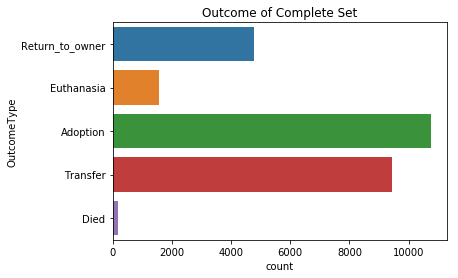

In [208]:
sns.countplot(y="OutcomeType", data=df).set_title("Outcome of Complete Set")
plt.show()

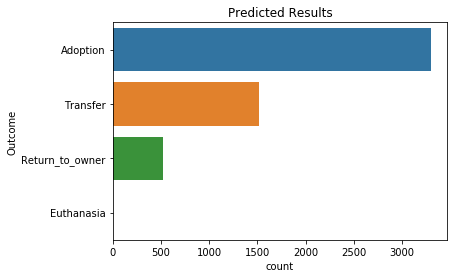

In [209]:
datasG = pd.DataFrame(dataforGraph)
datasG.columns = ["Outcome"]
sns.countplot(y="Outcome", data=datasG).set_title("Predicted Results")
plt.show()

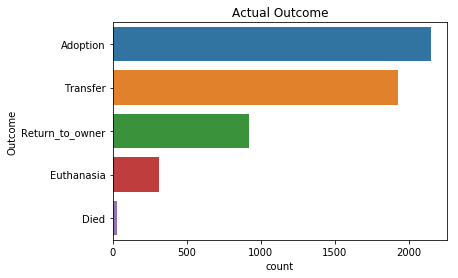

In [210]:
datasGTwo = pd.DataFrame(dataforGraphTwo)
datasGTwo.columns = ["Outcome"]
sns.countplot(y="Outcome", data= datasGTwo).set_title("Actual Outcome")
plt.show()

[0.00000000e+00 4.40528634e-04 4.40528634e-04 ... 9.94273128e-01
 9.97356828e-01 1.00000000e+00]
[0.00000000e+00 0.00000000e+00 6.50195059e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
0.80188893121681


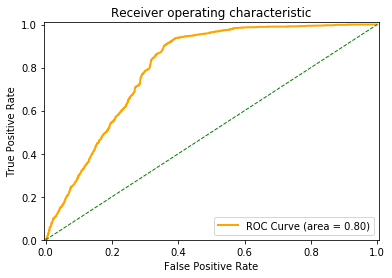

In [220]:
Prediction = my_logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, Prediction[:,1], pos_label="OK")
AUC = metrics.auc(fpr, tpr)
print(fpr)
print(tpr)
print(AUC)

%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='green', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

1. Introduce Ourselves
2. Introduce Topic -- Problems - Why - Address Problems
3. Discuss Data Set -- Features -- etc- 
4. Discuss PreProcessing the Data
5. Discuss Methods Used and Results
6. Data Analytics: Certain Breeds have a higher chance of survival, certain features correlate to other things etc... 
7. Outro/Conclusion -- Solution 